# Importing the dependencies

In [31]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cloning the yolov5 repository and installing the dependencies

!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -qr requirements.txt
%cd ..

## Loading the model and testing on sample image

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '150-epochs-best.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2023-3-28 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


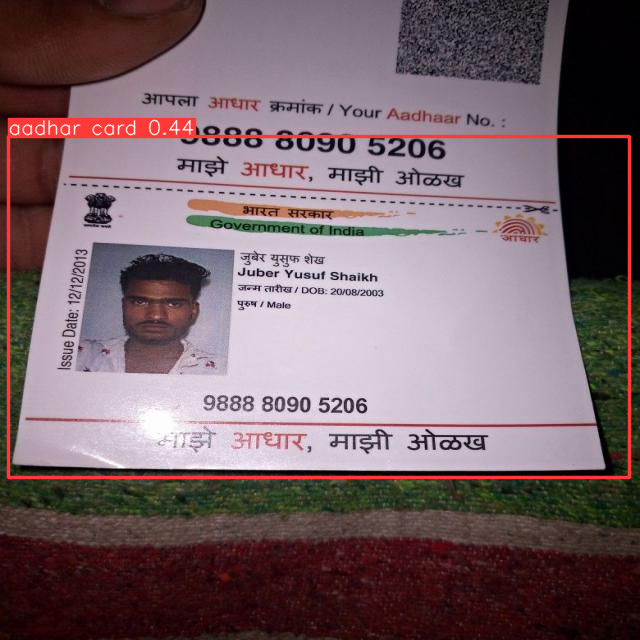

In [33]:
img = './dataset/test/images/1859e78e4fedad480a22f281fd678213_jpg.rf.72286eea1fa20e505a83a44ead5618d7.jpg'
results = model(img)  # inference
results.show()

In [34]:
names = ['aadhar card', 'driving license', 'pan card', 'salary slip', 'voter id']

image_and_confidence_dict = {
    'aadhar card' : {
        'confidence_score' : 0,
        'image' : []
    },
    'pan card' : {
        'confidence_score' : 0,
        'image' : []
    },
    'driving license' : {
        'confidence_score' : 0,
        'image' : []
    },
    'salary slip' : {
        'confidence_score' : 0,
        'image' : []
    },
    'voter id' : {
        'confidence_score' : 0,
        'image' : []
    }                       
}

In [35]:
confidence_score = float(results.xyxy[0][0][-2])
detected_class = names[int(results.xyxy[0][0][-1])]

## Function for saving image for extracting the details

In [36]:
def add_image_for_extraction(detected_class, confidence_score, frame):
    if image_and_confidence_dict[detected_class]['confidence_score'] < confidence_score:
        image_and_confidence_dict[detected_class]['confidence_score'] = confidence_score
        image_and_confidence_dict[detected_class]['image'] = frame

## Function for cropping the detection

In [37]:
def get_cropped_image(image, bounding_box):
    x1 = np.int32(bounding_box[0])
    y1 = np.int32(bounding_box[1])
    x2 = np.int32(bounding_box[2])
    y2 = np.int32(bounding_box[3])
    
    cropped_image = image[y1:y2, x1:x2]
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    return cropped_image

In [38]:
image_and_confidence_dict[detected_class]

{'confidence_score': 0, 'image': []}

In [39]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    
    ret, frame = cap.read()
    
    results = model(frame)

    
    cv2.imshow('document-classification', np.squeeze(results.render()))
    
    try:
        bbox = results.xyxy[0][0]
        frame = get_cropped_image(frame, bbox)

        detected_class = int(results.xyxy[0][0][-1])
        detected_class = names[detected_class]
        print(detected_class)
        confidence_score = float(results.xyxy[0][0][-2])
        add_image_for_extraction(detected_class, confidence_score, frame)
    except Exception as e:
        print("No document detected")

    
    
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

No document detected
No document detected
pan card
pan card
pan card
pan card
No document detected
No document detected
pan card
pan card
No document detected
No document detected
No document detected
pan card
pan card
pan card
No document detected
pan card
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
pan card
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detecte

No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
No document detected
pan card


In [40]:
image_and_confidence_dict

{'aadhar card': {'confidence_score': 0.692902147769928,
  'image': array([[[ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         [[ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255],
          ...,
          [ 56,  56, 255],
          [ 56,  56, 255],
          [ 56,  56, 255]],
  
         [[ 56,  56, 255],
          [ 56,  56, 255],
          [ 63,  64, 144],
          ...,
          [ 31,  28,  74],
          [ 36,  33, 111],
          [ 56,  56, 255]],
  
         ...,
  
         [[ 56,  56, 255],
          [ 56,  56, 255],
          [114, 103, 152],
          ...,
          [ 64,  70,  76],
          [ 60,  66, 110],
          [ 56,  56, 255]],
  
         [[ 56,  56, 255],
          [ 56,  56, 255],
          [ 97,  86, 165],
          ...,
          [ 64,  68, 115],
          [ 60,  64, 142],
          [ 56,  56, 255]],
  
         [[ 5